# A comparison of video game consoles and games using EDA and Statistical Analysis

In this project I will take a close look at the video game data set. I intend to clean up the data set and then use it to determine consumer trends based on the sales globally, and regionally. I will also look to see what kinds of games consumers purchase. By looking analyzing the data in this way I will be able to make marketing and development recommendations to game makers for their upcoming year in order to increase revenue.

**Step 1:** Open the data File and study the general information

In [1]:
#Import all the different packages needed for analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.express as px

In [2]:
#First look at the data
df = pd.read_csv('games.csv')
display(df.sample(5))
#I see that there is going to be a need to rename the column titles.

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1520,Mega Man Battle Network 3 Blue / White Version,GBA,2002.0,Role-Playing,0.39,0.02,0.85,0.03,NaN,NaN,NaN
14723,Turn It Around,DS,2006.0,Action,0.03,0.00,0.00,0.00,39.0,4.5,E
6271,Dragon Ball GT: Final Bout,PS,1997.0,Fighting,0.02,0.02,0.22,0.02,NaN,NaN,NaN
5191,Hamtaro: Ham-Ham Heartbreak,GBA,2002.0,Action,0.26,0.10,0.00,0.01,72.0,9.3,E
2207,MLB 06: The Show,PS2,2006.0,Sports,0.78,0.03,0.00,0.13,83.0,8.9,E


**Step 2:** Prepare the Data

In [3]:
#Renaming the columns to snake case
df.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'release_year', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'}, inplace=True)

In [4]:
#checking to see the Dtypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   release_year  16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Observations from the data info ###
I can see here that I'm going to need to change the user_score to float. The user_score column with all need to be multiplied by 10 to be compatible with the critic_score column

In [5]:
nan_count = df.isna().sum()
print(nan_count)
#NaN values are going to be an issue in this project. I will have to fill them in with meaningful data

name               2
platform           0
release_year     269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
rating          6766
dtype: int64


In [6]:
# what percentage of each column is null?
df.isnull().sum()/len(df)

name            0.000120
platform        0.000000
release_year    0.016093
genre           0.000120
na_sales        0.000000
eu_sales        0.000000
jp_sales        0.000000
other_sales     0.000000
critic_score    0.513192
user_score      0.400897
rating          0.404786
dtype: float64

In [7]:
# make a dataframe with missing value information
mis_values = df.isnull().sum().to_frame('missing_values')
mis_values['%'] = round((df.isnull().sum()/len(df))*100,3)
mis_values.sort_values(by='%', ascending=False)

,missing_values,%
critic_score,8578,51.319
rating,6766,40.479
user_score,6701,40.090
release_year,269,1.609
name,2,0.012
genre,2,0.012
platform,0,0.000
na_sales,0,0.000
eu_sales,0,0.000
jp_sales,0,0.000


In [8]:
# explore duplicated data
print('There are',df.duplicated().sum(), 'duplicated values to remove.')


There are 0 duplicated values to remove.


In [9]:
#Look at the range of years that this data set covers
min_year = df['release_year'].min()
max_year = df['release_year'].max()
print(f'The earliest game was released in {min_year}, and the most recent game was released in {max_year}.')

The earliest game was released in 1980.0, and the most recent game was released in 2016.0.


The games' release dates range from 1980 to 2016. I'm going to need this information later on when I begin looking at different eras of games. This 37 year period could be divided in many different ways. Initially I'm going to section the games by the decade in which they were released. So I will have 1980s, 1990s, 2000s, and 2010s. The 2010s column will only have 7 years, whereas the others will all have 10 years. Then I'll take a look to see if that still makes sense by seeing how much data there is in each decade. 

In [10]:
#In the user_score column there are "tbd" values that need to be dealt with. First I'm going to change them all to NaN
df['user_score'] = df['user_score'].str.replace('tbd', 'NaN', regex=True)

In [11]:
#Now I'm going to check the average and the median of the column to begin deciding what to replace the NaN values with
#In order to do this I'm going to have to change the data type to float from object
df['user_score'] = df['user_score'].apply(np.float64)
user_mean = df['user_score'].mean()
user_median = df['user_score'].median()
print(f'The average user score is: {user_mean:.1f}')
print('The median user score is:',user_median)

The average user score is: 7.1
The median user score is: 7.5


In [12]:
# now I'm going to check the mean and median of the critic_score column
critic_mean = df['critic_score'].mean()
critic_median = df['critic_score'].median()
print(f'The average critic score is:, {critic_mean:.1f}')
print('The median critic score is:', critic_median)

The average critic score is:, 69.0
The median critic score is: 71.0


Dealing with the NaN values: for the release year, genre, and name columns I'm going to remove the NaN values since they make up such a small portion of the total data. For the rating column I will fill all of the NaN values with 'unknown'. Finally, with the user and critic score I will leave the values as they are. It would unnecessarily affect analysis to fill those values with any other data, and because they make up such a large portion of the data it would be better to leave them in the data set.

In [13]:
#dropping the rows with the NaN values in the name, year, and genre columns because they make up such a small portion of the data.
df.dropna(subset=['release_year', 'genre', 'name'], inplace=True)
#for the values in the rating column i'm going to fill the NaN values with Unknown
df['rating'].fillna('unknown', inplace=True)

C:\Users\markl\AppData\Local\Temp\ipykernel_25956\2385328067.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('unknown', inplace=True)


In [14]:
#This block will multiply the whole of the user_score column by 10 so that the values are in the same format as the critic score
df['user_score'] = df['user_score'].multiply(10)
display(df.head())

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


Looking at the percentages of the amount of missing values it would definitely change the data to fill the the missing values with Median or Mean. 

In [15]:
#Now I'm going to make a new column that has a total sales for each game by summing the values from the na, eu, jp, and other sales columns
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
display(df.head())

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


**Step 3:** Analyze the Data

As stated above I've decided that I'm going to group the data based on the decade in which the games were each released. This will leave 10 years in the 80s, 90, and 00s, and 7 in the 10s.

In [16]:
df_80s = df[(df['release_year'] >= 1980) & (df['release_year'] <= 1989)]
df_90s = df[(df['release_year'] >= 1990) & (df['release_year'] <= 1999)]
df_00s = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2009)]
df_10s = df[(df['release_year'] >= 2010) & (df['release_year'] <= 2016)]

In [17]:
df_80s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 15957
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          205 non-null    object 
 1   platform      205 non-null    object 
 2   release_year  205 non-null    float64
 3   genre         205 non-null    object 
 4   na_sales      205 non-null    float64
 5   eu_sales      205 non-null    float64
 6   jp_sales      205 non-null    float64
 7   other_sales   205 non-null    float64
 8   critic_score  2 non-null      float64
 9   user_score    2 non-null      float64
 10  rating        205 non-null    object 
 11  total_sales   205 non-null    float64
dtypes: float64(8), object(4)
memory usage: 20.8+ KB


In [18]:
df_90s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1769 entries, 4 to 16694
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1769 non-null   object 
 1   platform      1769 non-null   object 
 2   release_year  1769 non-null   float64
 3   genre         1769 non-null   object 
 4   na_sales      1769 non-null   float64
 5   eu_sales      1769 non-null   float64
 6   jp_sales      1769 non-null   float64
 7   other_sales   1769 non-null   float64
 8   critic_score  94 non-null     float64
 9   user_score    90 non-null     float64
 10  rating        1769 non-null   object 
 11  total_sales   1769 non-null   float64
dtypes: float64(8), object(4)
memory usage: 179.7+ KB


In [19]:
df_00s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9193 entries, 0 to 16713
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          9193 non-null   object 
 1   platform      9193 non-null   object 
 2   release_year  9193 non-null   float64
 3   genre         9193 non-null   object 
 4   na_sales      9193 non-null   float64
 5   eu_sales      9193 non-null   float64
 6   jp_sales      9193 non-null   float64
 7   other_sales   9193 non-null   float64
 8   critic_score  5575 non-null   float64
 9   user_score    4872 non-null   float64
 10  rating        9193 non-null   object 
 11  total_sales   9193 non-null   float64
dtypes: float64(8), object(4)
memory usage: 933.7+ KB


In [20]:
df_10s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5277 entries, 14 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5277 non-null   object 
 1   platform      5277 non-null   object 
 2   release_year  5277 non-null   float64
 3   genre         5277 non-null   object 
 4   na_sales      5277 non-null   float64
 5   eu_sales      5277 non-null   float64
 6   jp_sales      5277 non-null   float64
 7   other_sales   5277 non-null   float64
 8   critic_score  2312 non-null   float64
 9   user_score    2499 non-null   float64
 10  rating        5277 non-null   object 
 11  total_sales   5277 non-null   float64
dtypes: float64(8), object(4)
memory usage: 535.9+ KB


By calling the info() method on each of the decade dataframes I found that in the number of games released each decade were as follows:
80s - 205;
90s - 1771;
00s - 9193;
10s - 5277

This shows that there is such a significant difference between the 80s and the other decades that I could lump the 80s and 90s together as one grouping. I will call it: df_retro

In addition to this, gaming changed significantly with the advent of the PS2 and Xbox consoles. These consoles were released in 2000 and 2001 respectively. It seems that it would be helpful to have a picture of gaming before these more modern style machines were introduced.

In [21]:
df_retro = df[(df['release_year'] >= 1980) & (df['release_year'] <= 1999)]

In [22]:
#I will use the groupby method to subtact release years of the games for each platform so that I can see how long
#each platform was in use. 
years_active = (df.groupby(['platform'])['release_year'].max() - df.groupby(['platform'])['release_year'].min()).reset_index()

#I'm going to use the groupby method again to see how each platform performed in total sales
platform_performance = (df.groupby(['platform'])['total_sales'].sum()).reset_index()
#I'll now merge the two previous lines to make a platform comparison df
platform_analysis = platform_performance.merge(years_active, how='left')
platform_analysis = platform_analysis.rename(columns={'release_year':'years_active'})
display(platform_analysis)
#from this I can see that the PC and DS ad the longest runs, and the TG16, PCFX, 3DO, and SCD had the shortest runs

,platform,total_sales,years_active
0,2600,86.48,9.0
1,3DO,0.10,1.0
2,3DS,257.81,5.0
3,DC,15.95,10.0
4,DS,802.78,28.0
5,GB,254.43,13.0
6,GBA,312.88,7.0
7,GC,196.73,6.0
8,GEN,28.35,4.0
9,GG,0.04,0.0


In [23]:
avg_lifespan = platform_analysis['years_active'].mean()
med_lifespan = platform_analysis['years_active'].median()
print(f'The average lifespan of a console is {avg_lifespan:.1f} years, and the median lifespan is {med_lifespan} years.')

The average lifespan of a console is 7.6 years, and the median lifespan is 6.0 years.


<Axes: title={'center': 'Annual Game Sales for the PS2'}, xlabel='Year', ylabel='Total Sales(Millions $)'>

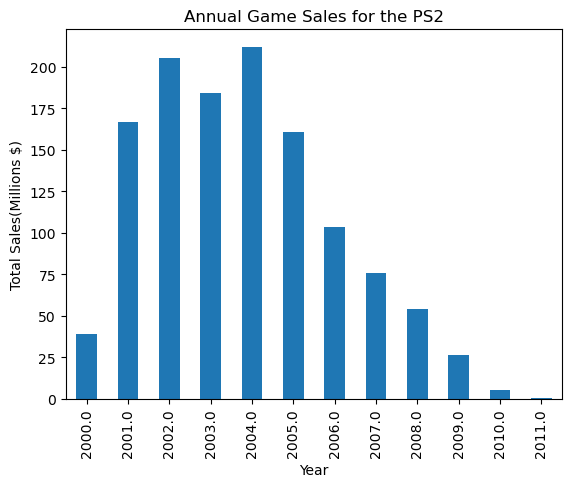

In [24]:
#Above I found that the PS2 grossed the most amount of money of all the platforms
#First I need to make a new df that is just for PS2 data
ps2_df = df[df['platform'] == 'PS2']
#now I'm grouping the dataframe by release year. 
ps2_annual = ps2_df.groupby(['release_year'])['total_sales'].sum().reset_index()
#finally, I can show a bar graph that shows each year's total sales
ps2_annual.plot(x='release_year', kind='bar', legend=False, xlabel='Year', ylabel='Total Sales(Millions $)',title='Annual Game Sales for the PS2')



In [25]:
active = df[df['release_year']==2016.0]
#display(active.head())
act_plat = active['platform'].unique()
#display(act_plat)

#Using ~ and isin with the act_plat list to then only find platforms that have no sales in 2016, i.e. they are no longer active platforms.
inactive = df[~df['platform'].isin(act_plat)]
#display(inactive.head())

inact_plat = inactive['platform'].unique()
print(inact_plat)

['NES' 'GB' 'DS' 'PS2' 'SNES' 'GBA' 'N64' 'PS' 'XB' '2600' 'PSP' 'GC'
 'GEN' 'DC' 'SAT' 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Xbox One and PS4 were both released in 2013, and the WiiU was released in 2012. The 3DS and the PSV was released in 2011. Of all the active systems in 2016, these all are the most current generation. I'm choosing to look more closely at the data from 2011 onward for the next portion of analysis.

In [26]:
new_gen = df[df['release_year']>=2011]
display(new_gen.head())
new_gen_plat = new_gen['platform'].unique()
display(new_gen_plat)
print(f"Data period for the new generation: {new_gen['release_year'].min()} to {new_gen['release_year'].max()}")


,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,34.0,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60


array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2'], dtype=object)

Data period for the new generation: 2011.0 to 2016.0


In [27]:
#getting a broad view of how sales for these 6 years have been
trend1 = df[(df['release_year']>=2011) & (df['release_year']<=2016)]
display(trend1.groupby('release_year')['total_sales'].sum().reset_index())

,release_year,total_sales
0,2011.0,507.58
1,2012.0,355.84
2,2013.0,361.24
3,2014.0,331.53
4,2015.0,267.98
5,2016.0,129.94


In [28]:
#I'm going to show how each of the platforms have performed in the last 6 years.
new_plat_perf = (new_gen.groupby(['platform'])['total_sales'].sum()).reset_index()
new_plat_perf = new_plat_perf.sort_values(by='total_sales', ascending=False)
#I only want to see data for platforms that have sales in the last 6 years
new_plat_perf = new_plat_perf.replace(0,np.nan)
new_plat_perf = new_plat_perf.dropna()
display(new_plat_perf)

,platform,total_sales
4,PS3,445.57
10,X360,380.38
5,PS4,314.14
0,3DS,257.81
11,XOne,159.32
2,PC,97.68
8,Wii,95.02
9,WiiU,82.19
7,PSV,53.81
1,DS,38.73


From this analysis I can see that the PS3 has the highest sales in the last 6 years. However, I'm curious to know if the leading platforms are all growing. I know that the xbox 360 and PS3 are part of the previous generation and the new generation platforms are also in the top 5. 

In [29]:
top_5_plat = new_plat_perf.head(5)['platform'].tolist()
print(top_5_plat)

['PS3', 'X360', 'PS4', '3DS', 'XOne']


In [30]:
plat_sales_yearly = new_gen.groupby(['platform', 'release_year'])['total_sales'].sum().reset_index()
plat_sales_yearly = plat_sales_yearly.replace(0, np.nan)
plat_sales_yearly = plat_sales_yearly.dropna()
#display(plat_sales_yearly)

In [31]:
platform_trends = {}

for platform in top_5_plat:
    platform_data = plat_sales_yearly[plat_sales_yearly['platform'] == platform]
    platform_data.set_index('release_year', inplace=True)
    
    # Calculate year-over-year percentage change
    platform_data['yearly_change_%'] = platform_data['total_sales'].pct_change() * 100
    
    # Store the trend data
    platform_trends[platform] = platform_data
    
# Display trends
for platform, data in platform_trends.items():
    print(f"\nTrend for {platform}:")
    display(data)


Trend for PS3:


C:\Users\markl\AppData\Local\Temp\ipykernel_25956\1580062258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_data['yearly_change_%'] = platform_data['total_sales'].pct_change() * 100
C:\Users\markl\AppData\Local\Temp\ipykernel_25956\1580062258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_data['yearly_change_%'] = platform_data['total_sales'].pct_change() * 100
C:\Users\markl\AppData\Local\Temp\ipykernel_25956\1580062258.py:8: SettingWithCopyWarning: 
A value is trying to be set 

,platform,total_sales,yearly_change_%
release_year,,,
2011.0,PS3,156.78,NaN
2012.0,PS3,107.36,-31.521878
2013.0,PS3,113.25,5.486215
2014.0,PS3,47.76,-57.827815
2015.0,PS3,16.82,-64.782245
2016.0,PS3,3.60,-78.596908



Trend for X360:


,platform,total_sales,yearly_change_%
release_year,,,
2011.0,X360,143.84,NaN
2012.0,X360,99.74,-30.659066
2013.0,X360,88.58,-11.189092
2014.0,X360,34.74,-60.781215
2015.0,X360,11.96,-65.572827
2016.0,X360,1.52,-87.290970



Trend for PS4:


,platform,total_sales,yearly_change_%
release_year,,,
2013.0,PS4,25.99,NaN
2014.0,PS4,100.00,284.763371
2015.0,PS4,118.90,18.900000
2016.0,PS4,69.25,-41.757780



Trend for 3DS:


,platform,total_sales,yearly_change_%
release_year,,,
2011.0,3DS,63.20,NaN
2012.0,3DS,51.36,-18.734177
2013.0,3DS,56.57,10.144081
2014.0,3DS,43.76,-22.644511
2015.0,3DS,27.78,-36.517367
2016.0,3DS,15.14,-45.500360



Trend for XOne:


,platform,total_sales,yearly_change_%
release_year,,,
2013.0,XOne,18.96,NaN
2014.0,XOne,54.07,185.179325
2015.0,XOne,60.14,11.226188
2016.0,XOne,26.15,-56.518124


All of the top 5 platforms had a down 2016 in sales. The xbox 360, ps3, and 3DS all had downward trends for the whole 6 year period. The xbox1 and the ps4 seemed to be in a growth pattern.

In [32]:
growing_platforms = [platform for platform, data in platform_trends.items() if data['yearly_change_%'].mean() > 0]

print(f"Currently profitable platforms: {growing_platforms}")

Currently profitable platforms: ['PS4', 'XOne']


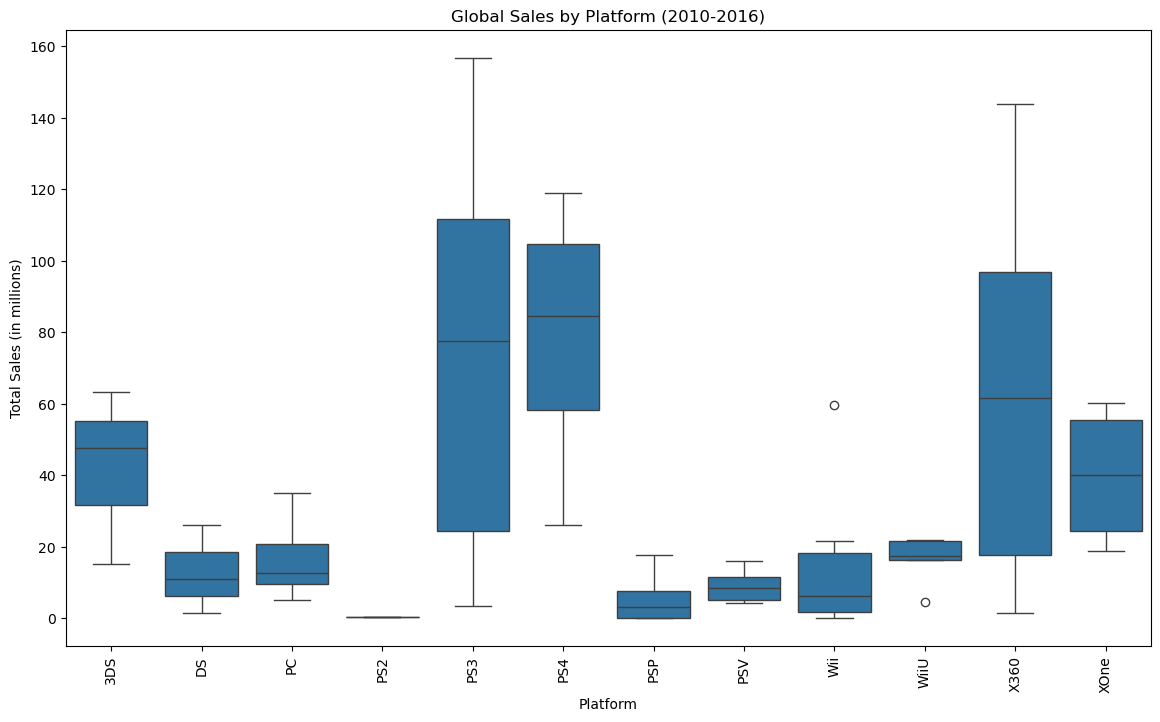

In [33]:
#Make a box plot that shows the global sales of all games broken down by platform
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=plat_sales_yearly)
plt.title('Global Sales by Platform (2010-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

Looking at this boxplot it appears that the volume of sales for both Microsoft and Sony Platforms have been significantly higher than anything from Nintendo or PC. The launch of the PS4 has had significantly more revenue than that of its competitor, the Xbox One. However, given that the Median lines for both of these platforms are below the the middle of the box, it would suggest that both are showing and underperforming trend.

In [34]:
#I'm curious to see what is going on with the Xbox One because it appears to be underperforming.
#First make a new Dataframe with just the Xbox  One Data
x1 = new_gen[new_gen['platform'] == 'XOne']

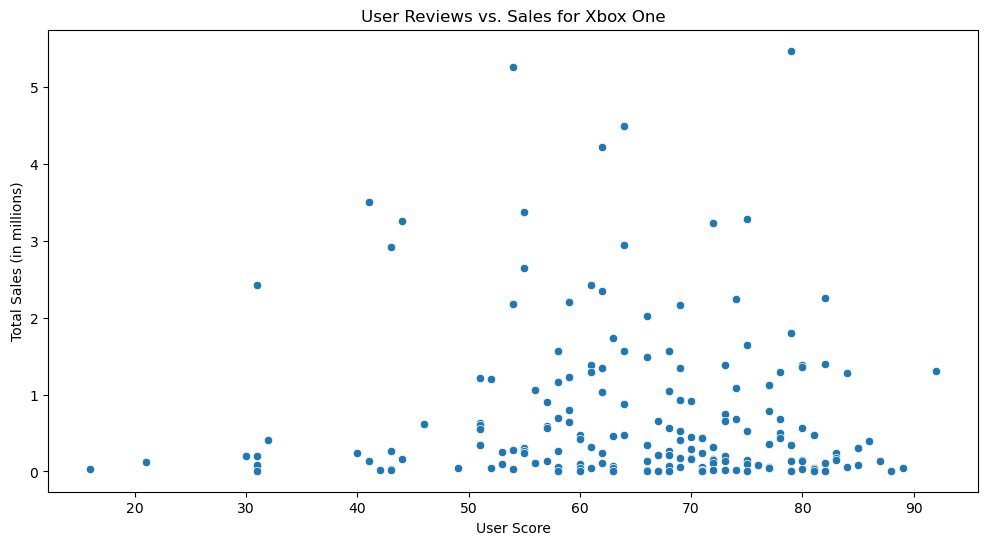

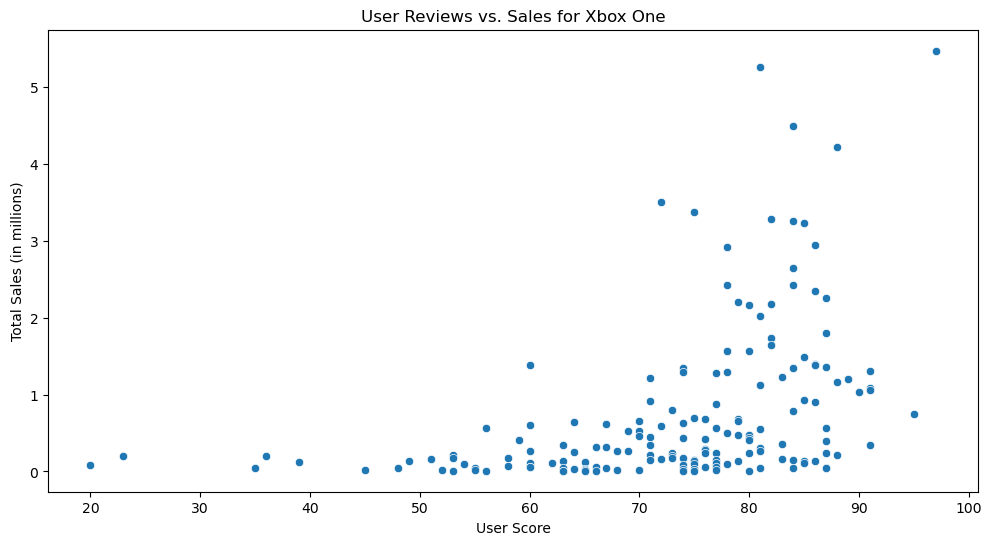

In [35]:
#First plt is user score vs. total sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='total_sales', data=x1)
plt.title(f'User Reviews vs. Sales for Xbox One')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.show()
#Second plt is critic score vs. total sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=x1)
plt.title(f'User Reviews vs. Sales for Xbox One')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.show()

In [36]:
#calculating correlation for user score
user_score_corr = x1[['user_score', 'total_sales']].corr().iloc[0, 1]
print(f'The correlation coeffecient for user score to total sales is: {user_score_corr:.3f}.')
#calculating correlation for critic score
crit_score_corr = x1[['critic_score', 'total_sales']].corr().iloc[0, 1]
print(f'The correlation coeffecient for the critic score to total sales is: {crit_score_corr:.3f}.')

The correlation coeffecient for user score to total sales is: -0.069.
The correlation coeffecient for the critic score to total sales is: 0.417.


There doesn't seem to be a significant correlation between user score and total sales. There is a weak correllation between the critic score and sales. So it's possible that there is some connection there worth further investigation.

Now I'm going to begin looking into how games sell depending on the platforms they're released on.

In [37]:
#First I'm going to make a variable that has just the titles for all the XOne games
x1_titles = x1['name'].unique()
#display(x1_titles)
title_comparisons = new_gen[new_gen['name'].isin(x1_titles)]
#display(title_comparisons.head())
#make a new dataframe that shows the Game Title, Which platform it is on, and what it's total sales are
compare_sales = title_comparisons.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
compare_sales = compare_sales.replace(0, np.nan)
compare_sales = compare_sales.dropna()
display(compare_sales.head())

,name,platform,total_sales
0,7 Days to Die,PS4,0.14
1,7 Days to Die,XOne,0.05
2,Adventure Time: Finn & Jake Investigations,3DS,0.09
3,Adventure Time: Finn & Jake Investigations,PS3,0.08
4,Adventure Time: Finn & Jake Investigations,PS4,0.10


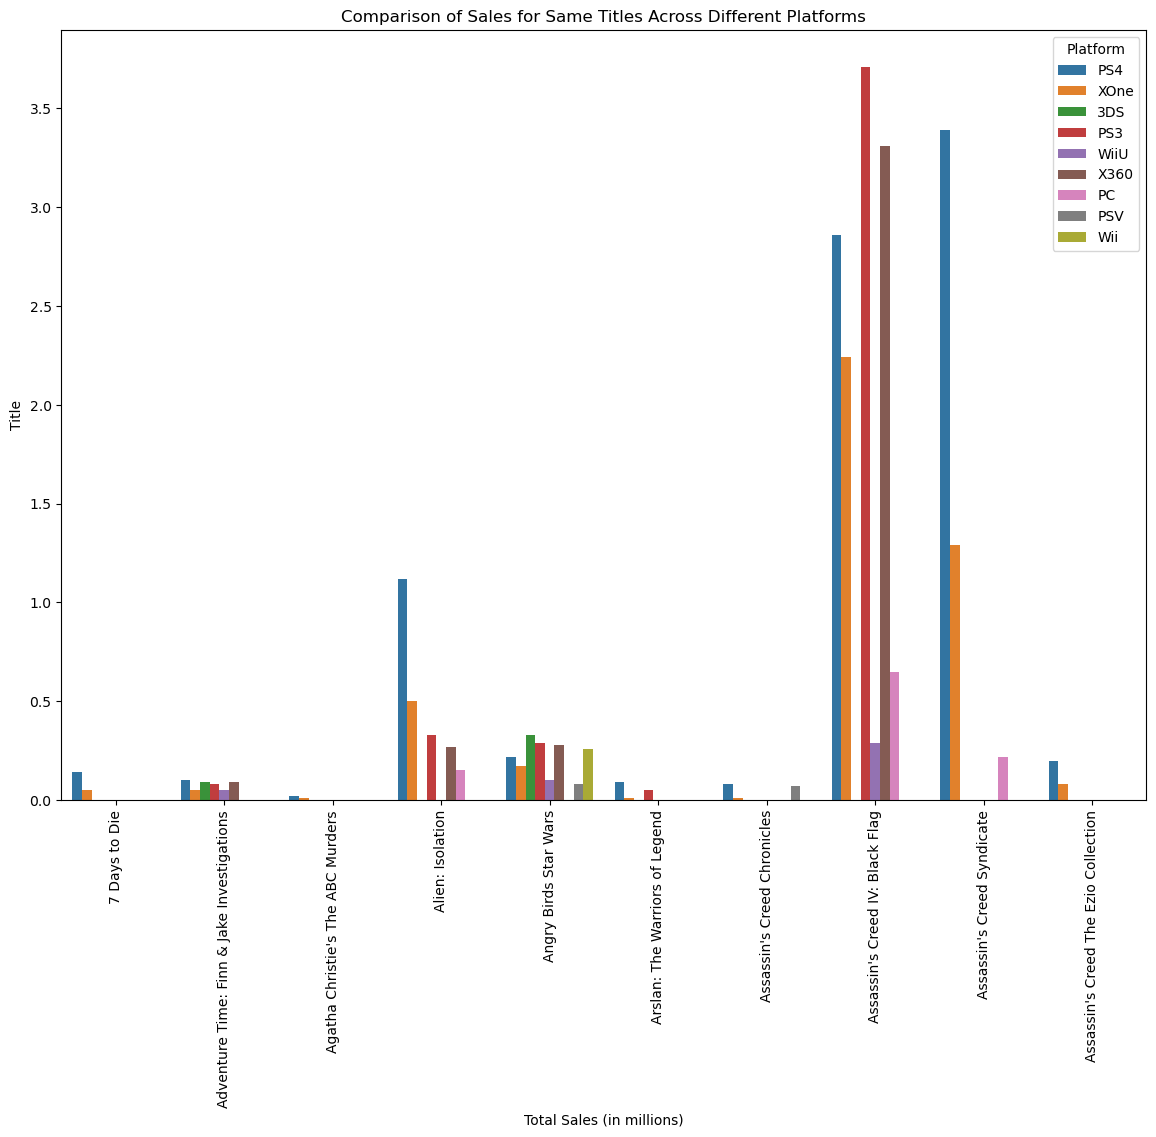

In [38]:
#I'm going to take a look at a sample set of 10 games since the data set is too large to do all the games
sample_data = compare_sales['name'].unique()[:10]
vis_data = compare_sales[compare_sales['name'].isin(sample_data)]

# Plotting
plt.figure(figsize=(14, 10))
sns.barplot(x='name', y='total_sales', hue='platform', data=vis_data)
plt.title('Comparison of Sales for Same Titles Across Different Platforms')
plt.xticks(rotation=90)
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Title')
plt.legend(title='Platform')
plt.show()

Now I'm going to begin looking at the different genres of games to get a feel for consumer trends in what kinds of games are getting purchased. 

In [39]:
#use the groupby strategy to find out how much revenue each genre generated
genre_comp = new_gen.groupby('genre')['total_sales'].sum().reset_index()
genre_comp = genre_comp.sort_values(by='total_sales', ascending=False)
display(genre_comp)

,genre,total_sales
0,Action,557.80
8,Shooter,402.91
7,Role-Playing,245.63
10,Sports,237.15
3,Misc,139.42
4,Platform,88.68
6,Racing,88.31
2,Fighting,66.90
9,Simulation,50.26
1,Adventure,45.04


In [40]:
#use the groupby strategy to find the average sales for each game within the genre
genre_avg = new_gen.groupby('genre')['total_sales'].mean().reset_index()
genre_avg = genre_avg.sort_values(by='total_sales', ascending=False)
genre_avg.columns = ['genre', 'avg_sales']
display(genre_avg)

,genre,avg_sales
8,Shooter,1.224650
4,Platform,0.726885
10,Sports,0.609640
7,Role-Playing,0.528237
6,Racing,0.490611
0,Action,0.439559
2,Fighting,0.420755
3,Misc,0.371787
9,Simulation,0.369559
11,Strategy,0.189402


In [41]:
#merge the two above dataframe
genre_sales = genre_comp.merge(genre_avg, on='genre')
display(genre_sales)

,genre,total_sales,avg_sales
0,Action,557.80,0.439559
1,Shooter,402.91,1.224650
2,Role-Playing,245.63,0.528237
3,Sports,237.15,0.609640
4,Misc,139.42,0.371787
5,Platform,88.68,0.726885
6,Racing,88.31,0.490611
7,Fighting,66.90,0.420755
8,Simulation,50.26,0.369559
9,Adventure,45.04,0.109854


Text(0, 0.5, 'Total Sales in Millions')

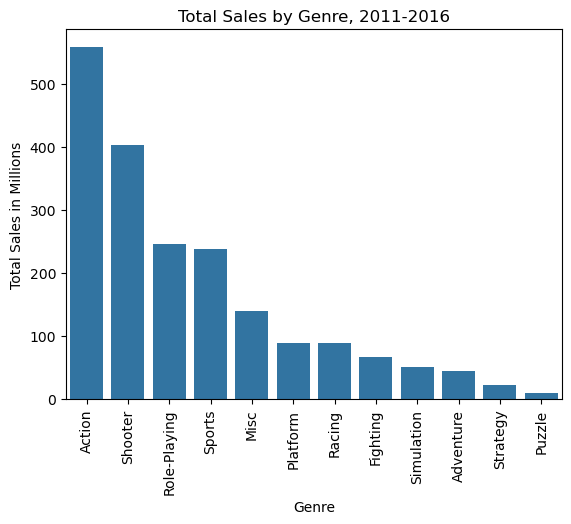

In [42]:
#Make a bar graph showing the sales distribution
sns.barplot(x='genre', y='total_sales', data=genre_sales)
plt.xticks(rotation=90)
plt.title('Total Sales by Genre, 2011-2016')
plt.xlabel('Genre')
plt.ylabel('Total Sales in Millions')


Text(0, 0.5, 'Average Sales in Millions')

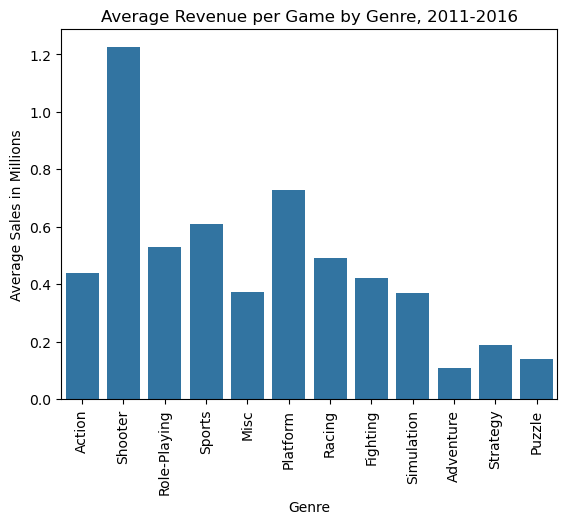

In [43]:
#Make a bargraph showing the averages distribution
sns.barplot(x='genre', y='avg_sales', data=genre_sales)
plt.xticks(rotation=90)
plt.title('Average Revenue per Game by Genre, 2011-2016')
plt.xlabel('Genre')
plt.ylabel('Average Sales in Millions')

Genre conclusions: From this initial analysis, it is clear that not all games perform as well as others and there are definite trends toward action, and shooter style games. Since these were based on global sales it could potentially be worth exploring whether or not there is the same distribution based on the different regions.

**Step 4:** Create a user profile for each region

I will create a North America, Europe, and Japan profile to compare sales in each region. I will look at which platforms and genres are most popular in each region based on their sales. Then I will look at the effect of ESRB ratings in each region.

In [44]:
#NA Sales
na_data = new_gen.groupby(['genre', 'platform'])['na_sales'].sum().reset_index()
na_data = na_data.replace(0, np.nan)
na_data = na_data.dropna()
display(na_data.head())
#EU Sales
eu_data = new_gen.groupby(['genre', 'platform'])['eu_sales'].sum().reset_index()
eu_data = eu_data.replace(0, np.nan)
eu_data = eu_data.dropna()
display(eu_data.head())
#JP Sales
jp_data = new_gen.groupby(['genre', 'platform'])['jp_sales'].sum().reset_index()
jp_data = jp_data.replace(0, np.nan)
jp_data = jp_data.dropna()
display(jp_data.head())

,genre,platform,na_sales
0,Action,3DS,19.62
1,Action,DS,4.53
2,Action,PC,6.17
4,Action,PS3,56.67
5,Action,PS4,32.83


,genre,platform,eu_sales
0,Action,3DS,12.66
1,Action,DS,2.54
2,Action,PC,11.16
4,Action,PS3,59.57
5,Action,PS4,42.71


,genre,platform,jp_sales
0,Action,3DS,22.66
1,Action,DS,0.78
3,Action,PS2,0.06
4,Action,PS3,19.00
5,Action,PS4,5.90


In [45]:
#top NA platforms
na_platform = na_data.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
display(na_platform.head())
#top EU platforms
eu_platform = eu_data.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
display(eu_platform.head())
#top JP platforms
jp_platform = jp_data.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
display(jp_platform.head())

,platform,na_sales
10,X360,226.80
4,PS3,168.26
5,PS4,108.74
11,XOne,93.12
0,3DS,82.65


,platform,eu_sales
4,PS3,163.10
5,PS4,141.09
10,X360,117.10
0,3DS,61.27
2,PC,56.70


,platform,jp_sales
0,3DS,100.62
3,PS3,49.39
5,PSP,24.04
6,PSV,21.84
4,PS4,15.96


In [46]:
# NA genre
na_genre = na_data.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
display(na_genre.head())
#EU genre
eu_genre = eu_data.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
display(eu_genre.head())
#JP genre
jp_genre = jp_data.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
display(jp_genre.head())

,genre,na_sales
0,Action,230.92
8,Shooter,194.43
10,Sports,108.70
7,Role-Playing,83.78
3,Misc,69.69


,genre,eu_sales
0,Action,199.12
8,Shooter,148.02
10,Sports,88.48
7,Role-Playing,62.30
6,Racing,40.58


,genre,jp_sales
7,Role-Playing,79.87
0,Action,63.62
3,Misc,17.60
2,Fighting,12.38
4,Platform,12.13


There is a very clear difference in the genre's preferred by Japanese consumers. These games seem to be reflective of the platform that is more popular. In Japan there appears to be a preference toward hand held devices. They also have a strong preference toward Japanese companies. Microsoft did not make the top 5 platforms for Japan. 

In [47]:
esrb_df = new_gen.dropna()
#NA ESRB comparison
na_esrb = esrb_df.groupby(['rating'])['na_sales'].sum().reset_index()
display(na_esrb)
#EU ESRB comparison
eu_esrb = esrb_df.groupby(['rating'])['eu_sales'].sum().reset_index()
display(eu_esrb)
#JP ESRB comparison
jp_esrb = esrb_df.groupby(['rating'])['jp_sales'].sum().reset_index()
display(jp_esrb)

,rating,na_sales
0,E,139.93
1,E10+,93.52
2,M,294.44
3,RP,0.00
4,T,99.37
5,unknown,1.20


,rating,eu_sales
0,E,121.39
1,E10+,61.60
2,M,240.11
3,RP,0.03
4,T,77.41
5,unknown,3.88


,rating,jp_sales
0,E,34.96
1,E10+,10.93
2,M,24.95
3,RP,0.00
4,T,28.94
5,unknown,0.89


Text(0, 0.5, 'North America Sales in Millions')

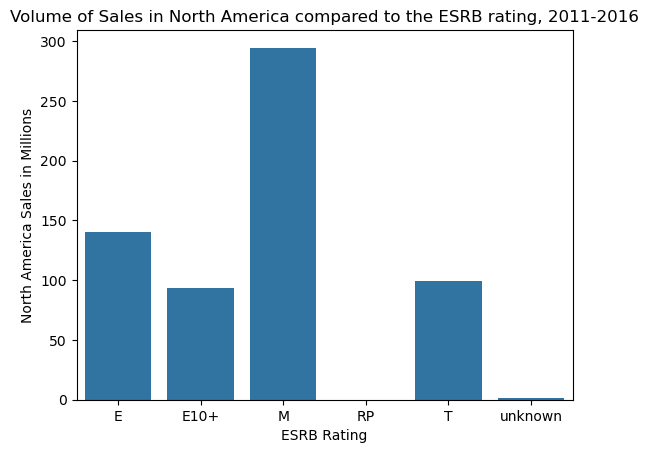

In [48]:
#Visualization of NA ESRB data
sns.barplot(x='rating', y='na_sales', data=na_esrb)
plt.title('Volume of Sales in North America compared to the ESRB rating, 2011-2016')
plt.xlabel('ESRB Rating')
plt.ylabel('North America Sales in Millions')

Text(0, 0.5, 'European Sales in Millions')

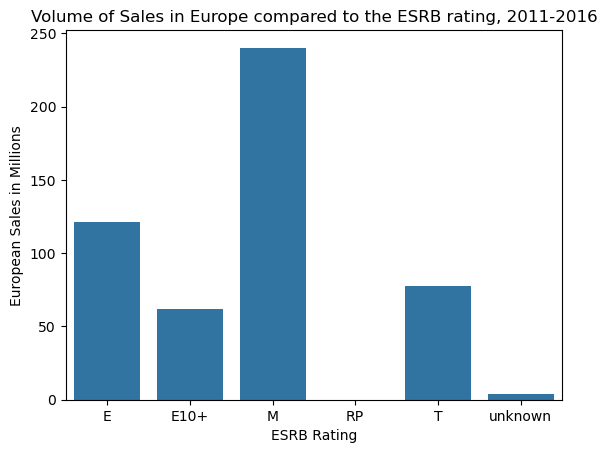

In [49]:
#Visualization of EU ESRB data
sns.barplot(x='rating', y='eu_sales', data=eu_esrb)
plt.title('Volume of Sales in Europe compared to the ESRB rating, 2011-2016')
plt.xlabel('ESRB Rating')
plt.ylabel('European Sales in Millions')

Text(0, 0.5, 'Japanese Sales in Millions')

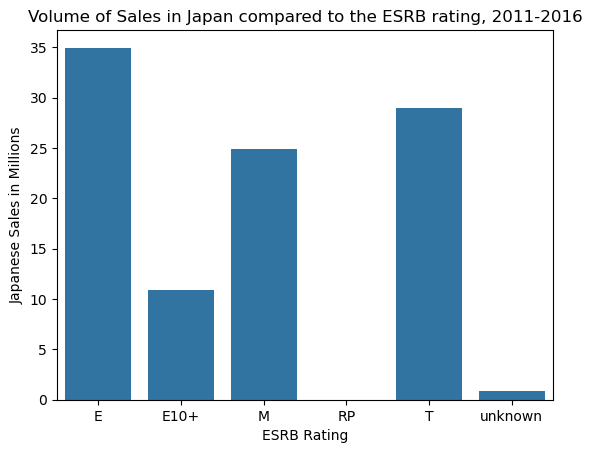

In [50]:
#Visualization of JP ESRB data
sns.barplot(x='rating', y='jp_sales', data=jp_esrb)
plt.title('Volume of Sales in Japan compared to the ESRB rating, 2011-2016')
plt.xlabel('ESRB Rating')
plt.ylabel('Japanese Sales in Millions')

In [51]:
#Adding the proposed Pie Chart in order to see the data in a different format, and to learn about using subsets
from plotly.subplots import make_subplots    
# Create individual pie charts with Plotly Express
fig_jp = px.pie(jp_esrb, values='jp_sales', names='rating', title='ESRB-JP')
fig_eu = px.pie(eu_esrb, values='eu_sales', names='rating', title='ESRB-EU')
fig_na = px.pie(na_esrb, values='na_sales', names='rating', title='ESRB-NA')

# Create a subplot grid with 1 row and 3 columns
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# Add each pie chart to the subplot
fig.add_trace(fig_jp.data[0], row=1, col=1)
fig.add_trace(fig_eu.data[0], row=1, col=2)
fig.add_trace(fig_na.data[0], row=1, col=3)

# Update layout to show the titles properly
fig.update_layout(title_text="ESRB Ratings Comparison", showlegend=False)

# Show the combined plot
fig.show()

After looking at the barcharts for the ESRB ratings in each region, it appears that Europe and North America have similar profiles regarding the types of games they prefer to purchase. Japan however appears to prefer games with E for everyone or T for Teen ratings over more M for mature games. 

**Step 5:** Test the following hypotheses:

Null Hypothesis: The average user ratings for the Xbox One and the PC are the same

Alternative Hypothesis: The average user rating for the Xbox One and the PC are different

Alpha: I'm setting it at .05 because that is the industry standard unless we are aiming for a very stringent test

In [52]:
# Filter data for Xbox One and PC platforms
xone_data = new_gen[new_gen['platform'] == 'XOne']
pc_data = new_gen[new_gen['platform'] == 'PC']

XOne = xone_data['user_score'].dropna()
PC = pc_data['user_score'].dropna()

# Perform the t-test
results = st.ttest_ind(XOne, PC, equal_var=False)

# alpha value
alpha = 0.05

# Print the results
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.613071224763855
We can't reject the null hypothesis


It appears that statistically the average user score is very similar between the Xbox One and PC. 

Null Hypothesis: The average ratings for sports and action games are the same

Alternative Hypothesis: The average ratings for sports and action games are different

Alpha: I'm setting it at .05 because that is the industry standard unless we are aiming for a very stringent test

In [53]:
# Define data for each genre
action_data = new_gen[new_gen['genre'] == 'Action']
sports_data = new_gen[new_gen['genre'] == 'Sports']

# Define user_score for each genre
action = action_data['user_score'].dropna()
sports = sports_data['user_score'].dropna()

# Perform the t-test
results_genres = st.ttest_ind(action, sports, equal_var=False)

# Print the p-value and hypothesis testing result for genres
print('p-value:', results_genres.pvalue)
if results_genres.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 8.285648549432147e-19
We reject the null hypothesis


There is a clear difference between the Action and Sports genres in their user score. 

## Conclusion ##

Methods: 
In this project I used Exploratory Data Analysis to understand the video game information from 1980 to 2016. In order to beging thinking about modern trends in consumer behaviors, I chose to isolate the data from 2011 to 2016. This newer data set showed the tail end of the previous generation of video consoles and the inception of the present generation (at the time).

Global Findings:
In 2016 there was a sharp drop off of sales in the most popular consoles. The newest generation of gaming systems all saw a decrease in sales by more than 40%. This drop off needs to be explored in more depth. Sony Systems outperformed their Microsoft and Nintendo Counterparts in traditional console style systems. And Nintendo handheld systems outpeformed Sony. 

There was a strong trend of preference for games of the Action and Shooter genres. In fact, the Shooter variety had a substantially stronger average sales than the other genres.

Regional Findings:
When comparing the sales in North America, Europe, and Japan I found that there were strong similarities between Europe and North America in the types of games and consoles purchased. They both favor traditional console style systems. And they both lean toward games of the action and shooter genres. 

In Japan, however, there was a stronger preference toward handheld systems and games from the Role-Playing and Action genres. In addition to this I found that Japanese gamers tend to prefer games from the E or T ESRB rating as opposed to the M games that European and American conumers enjoy.

Recommendations: 
From this data it would appear that game developers would do well to make more shooter style games and market them more heavily in Europe and North America. While in Japan they would do better to make games that are Role-Playing. Because there was such a strong preference to Japanese systems (Sony and Nintendo) in Japan, developers would do well to highlight their games on these systems in Japan where as there was a stronger preference for Sony and Microsoft sytems in both Europe and North America. 